### Libraries

In [35]:
import importlib
import os
import sys

sys.path.insert(0, '../src')
import dataset
from torch.utils.data import DataLoader

importlib.reload(dataset)
from dataset import RORDDataset

In [36]:
# move all the files to base folder

# img_dir = '/media/tiagociiic/easystore/RORD/train/img'
# gt_dir = '/media/tiagociiic/easystore/RORD/train/gt'
# mask_dir = '/media/tiagociiic/easystore/RORD/train/mask'
# 
# for root, dirs, files in os.walk(img_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), img_dir)
# 
# for root, dirs, files in os.walk(gt_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), gt_dir)
# 
# for root, dirs, files in os.walk(mask_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), mask_dir)

### RORDDataset Class

In [37]:
# Create a sample dataset
external_disk_path = "/media/tiagociiic/easystore"
split = 'train'
dataset_dir = os.path.join(external_disk_path, "RORD")
train_dir = os.path.join(dataset_dir, split)
print(f"Dataset directory: {dataset_dir}")

Dataset directory: /media/tiagociiic/easystore/RORD


In [38]:
# Create an instance of the RORDDataset class
dataset = RORDDataset(root_dir=dataset_dir, split='debug', image_size=[512, 512])
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

2024-06-26 14:35:11.328 | INFO     | dataset:__init__:93 - Loading image, ground truth, and mask files...
2024-06-26 14:35:11.329 | INFO     | dataset:__init__:98 - Loading image files from: /media/tiagociiic/easystore/RORD/debug/img, ground truth files from: /media/tiagociiic/easystore/RORD/debug/gt, and mask files from: /media/tiagociiic/easystore/RORD/debug/multiclass_mask
2024-06-26 14:35:11.330 | INFO     | dataset:__init__:109 - Found 10 image files
2024-06-26 14:35:11.331 | INFO     | dataset:__init__:110 - Found 10 ground truth files
2024-06-26 14:35:11.331 | INFO     | dataset:__init__:111 - Found 10 mask files
2024-06-26 14:35:11.331 | INFO     | dataset:__init__:132 - Found 10 image files, 10 ground truth files, and 10 mask files
2024-06-26 14:35:11.332 | INFO     | dataset:__init__:139 - Found 10 common files in the directories


Image 1 range: [0.00, 1.00], GT 1 range: [0.00, 0.99], Mask 1 range: [0.00, 1.00]
Image: [[[0.1764706  0.22352941 0.05882353]
  [0.18431373 0.22352941 0.08627451]
  [0.2627451  0.30588236 0.16078432]
  ...
  [0.23921569 0.29411766 0.10588235]
  [0.26666668 0.31764707 0.12941177]
  [0.2901961  0.34117648 0.16078432]]

 [[0.18039216 0.21568628 0.09019608]
  [0.12156863 0.15686275 0.03137255]
  [0.2509804  0.2901961  0.15686275]
  ...
  [0.29803923 0.3529412  0.15686275]
  [0.3254902  0.3764706  0.19215687]
  [0.30588236 0.35686275 0.18039216]]

 [[0.1764706  0.20784314 0.12156863]
  [0.10980392 0.14117648 0.03921569]
  [0.15686275 0.1882353  0.07843138]
  ...
  [0.33333334 0.3882353  0.19215687]
  [0.2784314  0.32941177 0.14901961]
  [0.23137255 0.28235295 0.11372549]]

 ...

 [[0.5019608  0.6        0.58431375]
  [0.6509804  0.7490196  0.7294118 ]
  [0.62352943 0.7137255  0.6862745 ]
  ...
  [0.27058825 0.43529412 0.54509807]
  [0.24313726 0.4117647  0.52156866]
  [0.23529412 0.40784314

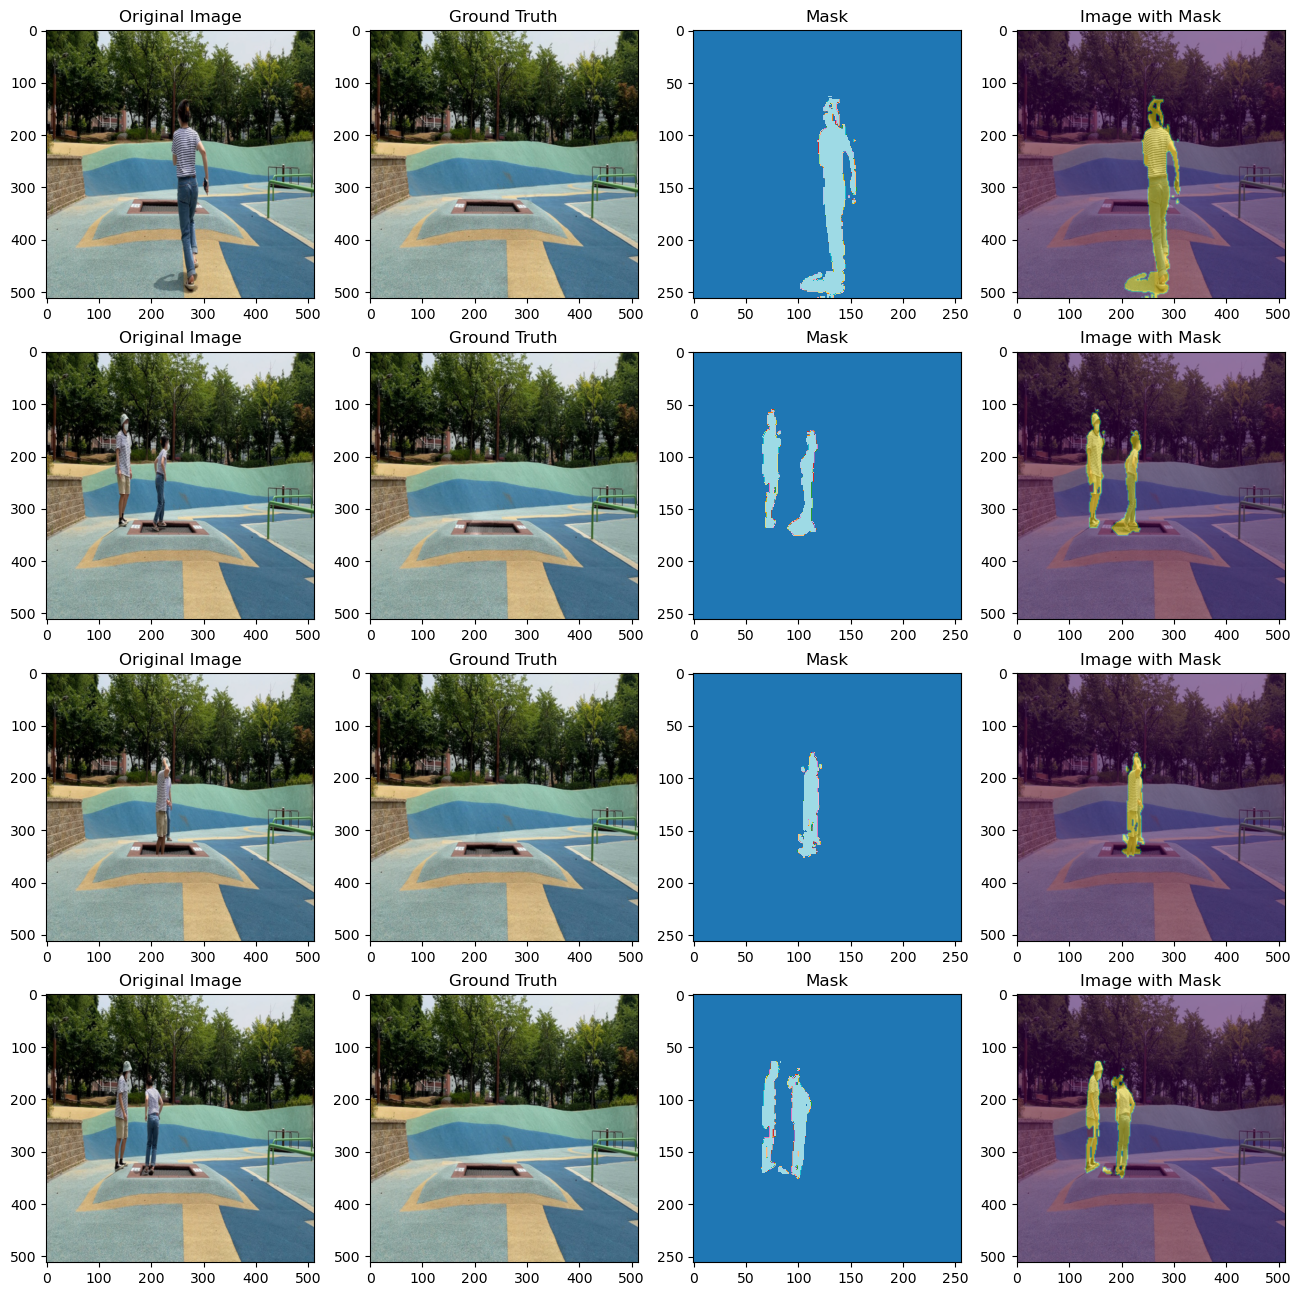

In [39]:
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

n_samples = 4
indices = random.sample(range(len(dataset)), n_samples)

plt.figure(figsize=(16, 16))
for i, index in enumerate(indices):
    sample = dataset[index]

    image = np.array(sample['image']).transpose(1, 2, 0)
    gt = np.array(sample['gt']).transpose(1, 2, 0)
    mask = np.array(sample['mask'])
    print(
        f"Image {i + 1} range: [{image.min():.2f}, {image.max():.2f}], GT {i + 1} range: [{gt.min():.2f}, {gt.max():.2f}], Mask {i + 1} range: [{mask.min():.2f}, {mask.max():.2f}]")

    plt.subplot(4, 4, i * 4 + 1)
    plt.imshow(image)
    print(f"Image: {image}, shape: {image.shape}, min: {image.min()}, max: {image.max()}, dtype: {image.dtype}")
    plt.title("Original Image")

    plt.subplot(4, 4, i * 4 + 2)
    plt.imshow(gt)
    plt.title("Ground Truth")

    plt.subplot(4, 4, i * 4 + 3)
    plt.imshow(mask, cmap='tab20')
    print(
        f"Mask: {mask}, shape: {mask.shape}, min: {mask.min()}, max: {mask.max()}, dtype: {mask.dtype}, unique: {np.unique(mask)}")
    plt.title("Mask")

    plt.subplot(4, 4, i * 4 + 4)
    mask = resize(mask, (512, 512), anti_aliasing=True)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title("Image with Mask")

plt.show()

In [40]:
# TODO: improve masking algorithm
# TODO: train model in the 161164 images

In [41]:
# test to check if the class is returning the correct triplet of images (image, gt, mask)

In [42]:
# initialize the dataset
import random
import numpy as np
import matplotlib.pyplot as plt

index = random.sample(range(len(dataset)), 1)
sample = dataset[index[0]]

image = np.array(sample['image']).transpose(1, 2, 0)
gt = np.array(sample['gt']).transpose(1, 2, 0)
mask = np.array(sample['mask']).transpose(1, 2, 0)
# plot the images
plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gt)
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(mask / 255.0)
plt.title("Mask")
plt.show()

ValueError: axes don't match array